In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 

In [2]:
df = pd.read_csv('user_behavior_dataset.csv') # lendo o csv
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [3]:
df.head() # mostrando as 5 primeiras linhas

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
df.shape # checando o tamanho do dataset

(700, 11)

In [5]:
df.isna().any() # check for missing values

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

In [6]:
df.info() # checando o tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [7]:
df.describe() # estatísticas descritivas

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [8]:
df = df.drop("User ID", axis=1) # removendo a coluna User ID
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [9]:
dispositivos = df.groupby('Device Model').size() # agrupando por modelo de dispositivo
dispositivos

Device Model
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Xiaomi Mi 11          146
iPhone 12             146
dtype: int64

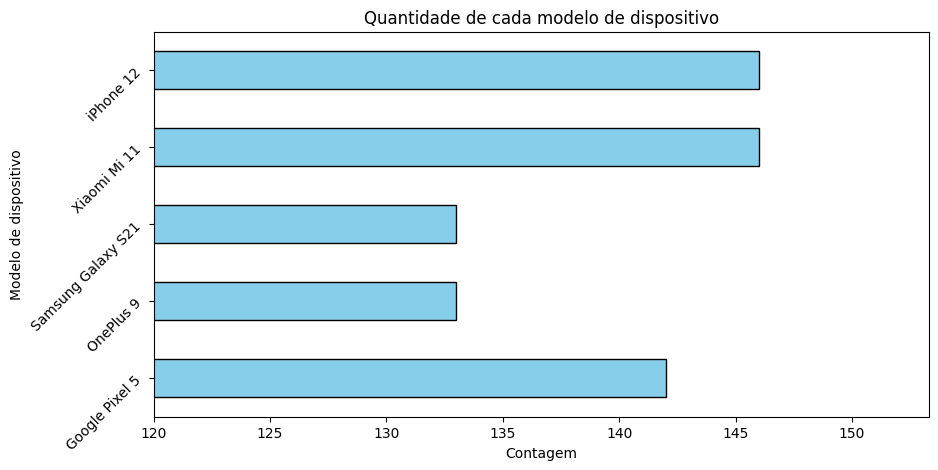

In [10]:
# criando um gráfico de barras para visualizar a quantidade de cada modelo de dispositivo
plt.figure(figsize=(10, 5)) # tamanho do gráfico
dispositivos.plot(kind='barh', color='skyblue', edgecolor = 'black') # tipo de gráfico e cor

# adicionando título e rótulos nos eixos
plt.title('Quantidade de cada modelo de dispositivo')
plt.xlabel('Contagem')
plt.ylabel('Modelo de dispositivo')

plt.yticks(rotation=45) # rotacionando os rótulos do eixo x

plt.xlim(120, None) # Definindo o inicio da contagem no eixo x

# exibindo o gráfico
plt.show() 

In [12]:
df_sistema = df.groupby('Operating System').size() # agrupando por sistema operacional
df_sistema

Operating System
Android    554
iOS        146
dtype: int64

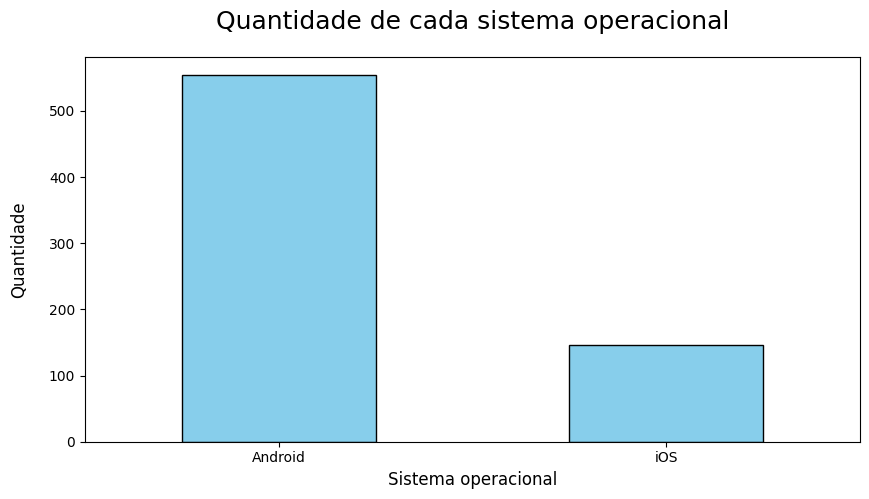

In [31]:
plt.figure(figsize=(10, 5)) # tamanho do gráfico
df_sistema.plot(kind='bar', color = 'skyblue', edgecolor = 'black') # tipo de gráfico e cor

plt.title('Quantidade de cada sistema operacional', fontsize = 18, pad = 20) # definindo o título
plt.xlabel('Sistema operacional', fontsize = 12) # definindo o rótulo do eixo x
plt.ylabel('Quantidade', fontsize = 12, labelpad= 15) # definindo o rótulo do eixo y

plt.xticks(rotation=0) # rotacionando os rótulos do eixo x
plt.show() # exibindo o gráfico

C:\Users\Pedro\AppData\Local\Temp\ipykernel_20888\1711410088.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], color='skyblue', shade=True, bw_adjust=0.5)


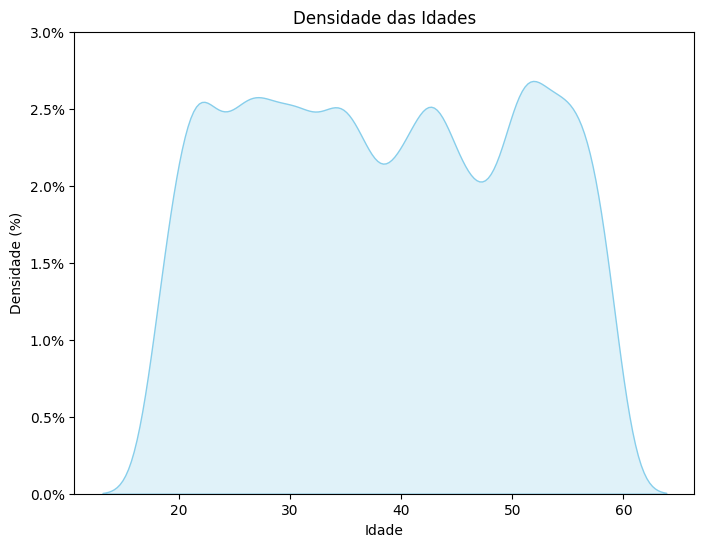

In [46]:
plt.figure(figsize=(8, 6))

# criando um gráfico de densidade para visualizar a distribuição das idades
sns.kdeplot(df['Age'], color='skyblue', shade=True, bw_adjust=0.5)

# Obter os limites do eixo y (densidade padrão)
ax = plt.gca()
y_ticks = ax.get_yticks()

# Transformar densidade para porcentagem
y_ticks_percent = y_ticks * 100
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{yt:.1f}%" for yt in y_ticks_percent])


plt.title("Densidade das Idades")
plt.xlabel("Idade")
plt.ylabel("Densidade (%)")
plt.show()

Text(0.5, 0, 'Idade')

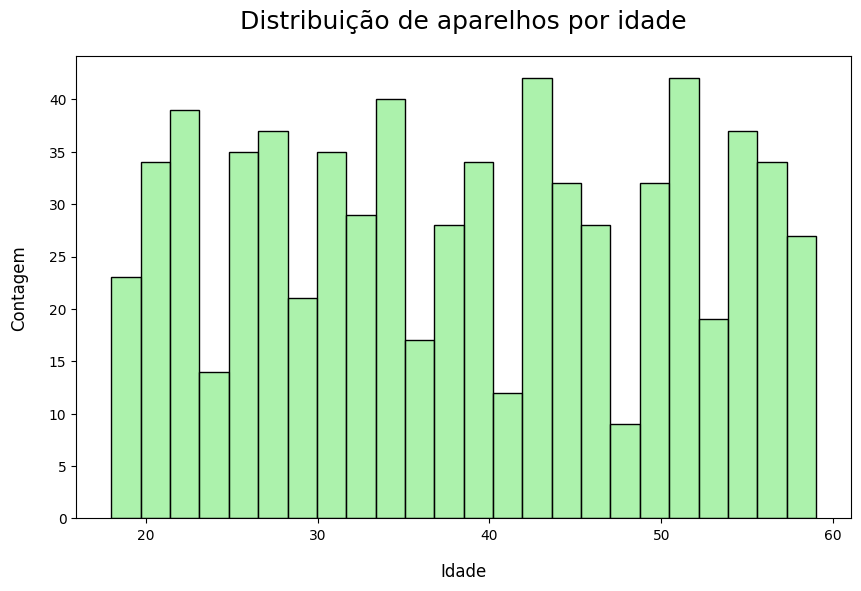

In [171]:
idade = df['Age'] # selecionando a coluna Idade

# criando um histograma para visualizar a distribuição da idade
plt.figure(figsize=(10,6)) # definindo tamanho para o gráfico

# usando a biblioteca seaborn para criar o histograma
sns.histplot(idade, bins=24, color='lightgreen', edgecolor = 'black') # criando o histograma

# definindo o título
plt.title("Distribuição de aparelhos por idade", fontsize = 18, pad = 20)

# definindo os rótulos dos eixos
plt.xlabel('Idade', fontsize = 12, labelpad = 15)
plt.ylabel('Contagem', fontsize = 12, labelpad = 15)


# definindo os rótulos dos eixos
plt.xlabel('Idade', fontsize = 12, labelpad = 15)

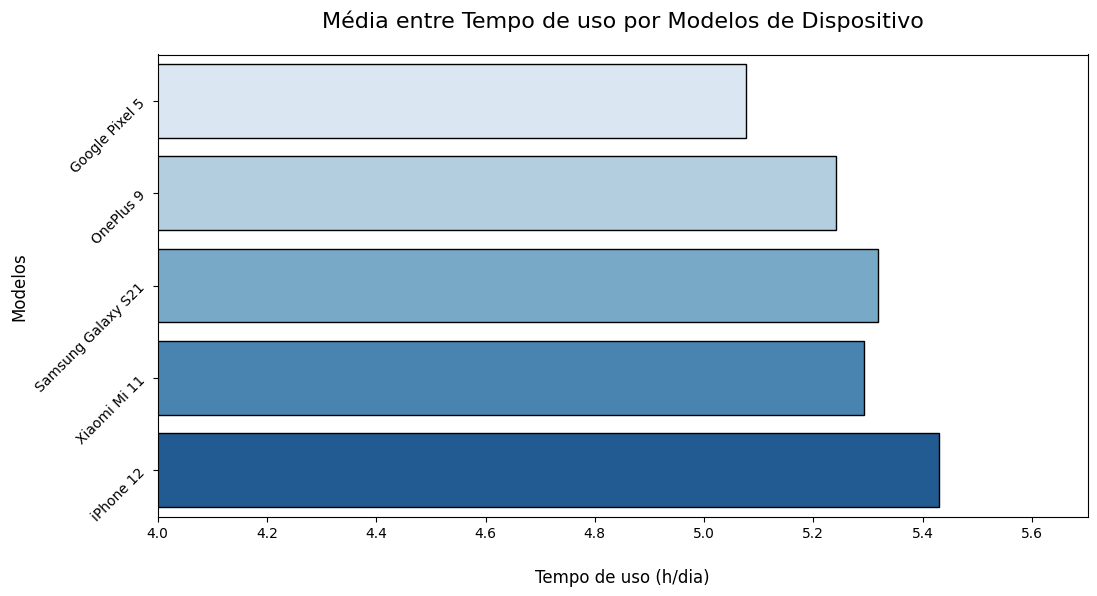

In [158]:
# Agrupar os dados por modelo de dispositivo e calcular a média do tempo de tela
df_agrupado = df.groupby('Device Model')['Screen On Time (hours/day)'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Screen On Time (hours/day)', y='Device Model', data=df_agrupado, palette='Blues', edgecolor = 'black')

# Adicionar título e rótulos aos eixos
plt.title('Média entre Tempo de uso por Modelos de Dispositivo', fontsize=16, pad=20)
plt.xlabel('Tempo de uso (h/dia)', fontsize=12, labelpad = 20)
plt.ylabel('Modelos', fontsize=12)

# Definindo ajustes
plt.yticks(rotation=45)

# Exibindo no gráfico
plt.xlim(4, None)

# Exibir o gráfico
plt.show()


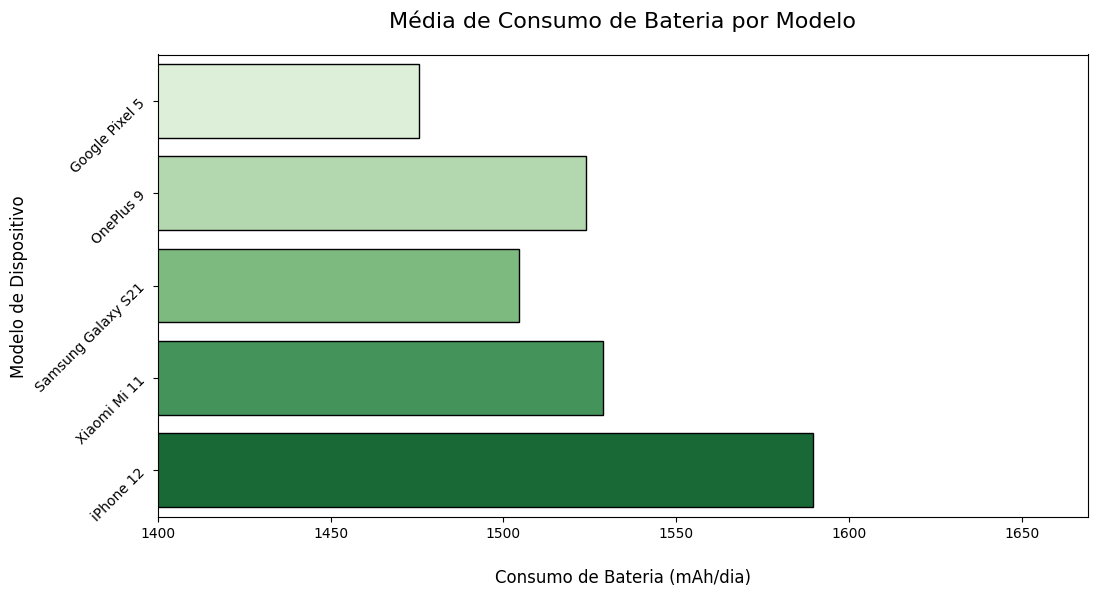

In [152]:
# Agrupar os dados por 'Device Model' e calcular a média de 'Battery Drain (mAh/day)'
df_battery_drain = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Battery Drain (mAh/day)', y='Device Model', data=df_battery_drain, palette='Greens', edgecolor = 'black')

# Adicionar título e rótulos aos eixos
plt.title('Média de Consumo de Bateria por Modelo', fontsize=16, pad=20)
plt.xlabel('Consumo de Bateria (mAh/dia)', fontsize=12, labelpad=20)
plt.ylabel('Modelo de Dispositivo', fontsize=12,)

# Definindo ajustes
plt.yticks(rotation=45)

# definindo um limite

plt.xlim(1400, None)


# Exibir o gráfico
plt.show()